<a href="https://colab.research.google.com/github/AlvaroFironze/ControlPractice/blob/master/%D0%9F%D0%B5%D1%80%D0%B2%D0%B0%D1%8F_%D0%9D%D0%B5%D0%B9%D1%80%D0%BE%D1%81%D0%B5%D1%82%D1%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.applications.inception_v3 import InceptionV3
from keras.callbacks import ModelCheckpoint
from keras.optimizers import SGD
from tensorflow.keras.utils import img_to_array


!pip3 install split-folders
import splitfolders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Делим датасет на тренировочный, валидационный и тренировочнфе части

In [ ]:
input_folder = "/content/drive/MyDrive/pokemon"
splitfolders.ratio(input_folder, '/content/drive/MyDrive/pokemon_splited', ratio = (0.65, 0.2, 0.15), seed=13, group_prefix=None)


Copying files: 6837 files [40:01,  2.85 files/s]


In [ ]:
from glob import glob
class_names=glob("/content/drive/MyDrive/pokemon/*/", recursive = True)
class_names=[i.split('/', 6)[5] for i in class_names]
class_names.

['Magikarp',
 'Articuno',
 'Arcanine',
 'Alolan Sandslash',
 'Aerodactyl',
 'Arbok',
 'Alakazam',
 'Beedrill',
 'Blastoise',
 'Bellsprout',
 'Abra',
 'Butterfree',
 'Clefairy',
 'Charizard',
 'Cloyster',
 'Bulbasaur',
 'Charmeleon',
 'Clefable',
 'Caterpie',
 'Charmander',
 'Chansey',
 'Cubone',
 'Doduo',
 'Dratini',
 'Dodrio',
 'Dragonite',
 'Drowzee',
 'Dragonair',
 'Ditto',
 'Diglett',
 'Dewgong',
 'Dugtrio',
 'Eevee',
 'Farfetchd',
 'Flareon',
 'Electabuzz',
 'Electrode',
 'Exeggutor',
 'Ekans',
 'Exeggcute',
 'Fearow',
 'Gloom',
 'Gengar',
 'Gastly',
 'Golduck',
 'Graveler',
 'Goldeen',
 'Grimer',
 'Golem',
 'Golbat',
 'Geodude',
 'Gyarados',
 'Ivysaur',
 'Hitmonchan',
 'Growlithe',
 'Hypno',
 'Hitmonlee',
 'Horsea',
 'Jigglypuff',
 'Jolteon',
 'Haunter',
 'Krabby',
 'Koffing',
 'Kadabra',
 'Lapras',
 'Kabutops',
 'Jynx',
 'Kabuto',
 'Kangaskhan',
 'Kakuna',
 'Kingler',
 'Magnemite',
 'Machop',
 'Lickitung',
 'Magmar',
 'Machoke',
 'Magneton',
 'Marowak',
 'Machamp',
 'Mankey',
 '

In [ ]:
train_dir = "/content/drive/MyDrive/pokemon_splited/train"
val_dir = "/content/drive/MyDrive/pokemon_splited/val"
test_dir ="/content/drive/MyDrive/pokemon_splited/test"

# Размер изображения для вохдного тензора нейросети 
img_width, img_height = 224, 224
input_shape = (img_width, img_height,3)

# Количество классов для обучения
num_classes = 150

# Количество эпох обучения
epochs = 50

# Количество изображений, которые будут подаваться НС при одной итерации обучения
batch_size = 18

In [ ]:
#преобразование картинок
datagen = ImageDataGenerator(rescale=1. / 255, 
    validation_split=0,
    vertical_flip=True,
    horizontal_flip=False,
    fill_mode='nearest')

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size = (img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    seed=1
)

validation_generator = datagen.flow_from_directory(
    val_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False,
    seed=1)

test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False,
    seed=1)

Found 4360 images belonging to 150 classes.
Found 1306 images belonging to 150 classes.
Found 1154 images belonging to 150 classes.


In [ ]:
train_generator
plt.figure()
plt.imshow(train_generator[0])
plt.colorbar()
plt.grid(False)

In [ ]:
#Подключаем модель НС

In [ ]:
base_model = tf.keras.applications.MobileNet(
    input_shape=(img_width, img_height, 3),
    include_top=False, #True
    weights='imagenet',
    classes=num_classes,
)
base_model.trainable = True

model = Sequential()
model.add(base_model)
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(num_classes, activation='softmax', name='predictions'))

model.layers[0].trainable = False
# Ещё раз включаем переобучение для всех слоёв НС
for cnn_block_layer in model.layers[0].layers:
   cnn_block_layer.trainable = True
model.layers[0].trainable = True

In [ ]:
learning_rate = 0.00001
decay_rate = learning_rate / epochs
momentum = 0.8
sgd = SGD(learning_rate=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
# Компиляция модели

model.compile(loss='categorical_crossentropy',
              optimizer=sgd, 
              metrics=['categorical_accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 7, 7, 1024)       3228864   
 nal)                                                            
                                                                 
 flatten (Flatten)           (None, 50176)             0         
                                                                 
 dropout (Dropout)           (None, 50176)             0         
                                                                 
 predictions (Dense)         (None, 150)               7526550   
                                                                 
Total params: 10,755,414
Trainable params: 10,733,526
Non-trainable params: 21,888
_________________________________________________________________


In [ ]:
cpt_dir = "/content/drive/MyDrive/pokemon/epoch/"  
# Балансировка весов в обучающей выборке при помощи пакета sklearn

from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight(class_weight ='balanced',
                                                 classes=np.unique(train_generator.classes),
                                                 y=train_generator.classes)
# Приведение к необходимому формату
class_weights = {i : class_weights[i] for i in range(len(class_weights))}
print(class_weights)

#
histoty = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator.filenames) // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=len(validation_generator.filenames) // batch_size,
    class_weight=class_weights,
    callbacks=[
          #Сохраняем лучшую эпоху обучения
          ModelCheckpoint(cpt_dir + '/{epoch:02d}_acc_{val_categorical_accuracy:.2f}.h5', monitor='val_categorical_accuracy', verbose=True, save_best_only=True), 
    ]
)

{0: 1.3212121212121213, 1: 1.3212121212121213, 2: 1.8166666666666667, 3: 1.117948717948718, 4: 1.117948717948718, 5: 1.117948717948718, 6: 1.0022988505747126, 7: 1.3212121212121213, 8: 1.117948717948718, 9: 1.0765432098765433, 10: 1.117948717948718, 11: 1.7098039215686274, 12: 1.211111111111111, 13: 1.0765432098765433, 14: 1.3212121212121213, 15: 0.8808080808080808, 16: 1.0022988505747126, 17: 1.211111111111111, 18: 1.0022988505747126, 19: 0.9688888888888889, 20: 1.117948717948718, 21: 1.0380952380952382, 22: 1.1626666666666667, 23: 1.117948717948718, 24: 1.1626666666666667, 25: 1.3212121212121213, 26: 1.0765432098765433, 27: 0.9376344086021505, 28: 1.8166666666666667, 29: 1.1626666666666667, 30: 0.8808080808080808, 31: 1.211111111111111, 32: 1.3212121212121213, 33: 1.117948717948718, 34: 0.8808080808080808, 35: 1.0022988505747126, 36: 0.9083333333333333, 37: 0.9376344086021505, 38: 0.9376344086021505, 39: 1.0022988505747126, 40: 1.0380952380952382, 41: 0.9376344086021505, 42: 1.321212

In [ ]:
model.evaluate_generator(test_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


[1.3228121995925903, 0.6672443747520447]

In [ ]:
#нерализованный просмотр ошибок
#imgs,labels=test_generator.next()
#array_imgs=np.transpose(np.asarray([img_to_array(img) for img in imgs]),(0,2,1,3))
#predictions=model.predict(imgs)
#rounded_pred=np.asarray(predictions)
#
#wrong=[im for im in zip(array_imgs, rounded_pred, labels, predictions) if im[1]!=im[2]]
#
#plt.figure(figsize=(12,12))
#for ind, val in enumerate(wrong[:100]):
#    plt.subplots_adjust(left=0, right=1, bottom=0, top=1, wspace = 0.2, hspace = 0.2)
#    plt.subplot(5,5,ind+1)
#    im=val[0]
#    plt.axis('off')
#    plt.text(120, 0, round(val[3], 2), fontsize=11, color='red')
#    plt.text(0, 0, val[2], fontsize=11, color='blue')
#    plt.imshow(np.transpose(im,(2,1,0)))


array([[[[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        ...,

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]

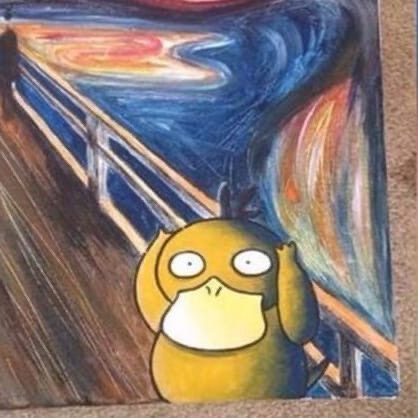

In [ ]:
from PIL import Image
image=Image.open('/content/drive/MyDrive/bV6fA7RVoM0.jpg')
image

In [ ]:
from skimage import transform
image = np.array(image).astype('float32')/255
image = transform.resize(image, (224, 224, 3))
image = np.expand_dims(image, axis=0)
model.predict(image).argmax(axis=-1)


1/1 [==============================] - 0s 23ms/step


array([144])

In [ ]:
print(validation_generator.class_indices)

{'Abra': 0, 'Aerodactyl': 1, 'Alakazam': 2, 'Alolan Sandslash': 3, 'Arbok': 4, 'Arcanine': 5, 'Articuno': 6, 'Beedrill': 7, 'Bellsprout': 8, 'Blastoise': 9, 'Bulbasaur': 10, 'Butterfree': 11, 'Caterpie': 12, 'Chansey': 13, 'Charizard': 14, 'Charmander': 15, 'Charmeleon': 16, 'Clefable': 17, 'Clefairy': 18, 'Cloyster': 19, 'Cubone': 20, 'Dewgong': 21, 'Diglett': 22, 'Ditto': 23, 'Dodrio': 24, 'Doduo': 25, 'Dragonair': 26, 'Dragonite': 27, 'Dratini': 28, 'Drowzee': 29, 'Dugtrio': 30, 'Eevee': 31, 'Ekans': 32, 'Electabuzz': 33, 'Electrode': 34, 'Exeggcute': 35, 'Exeggutor': 36, 'Farfetchd': 37, 'Fearow': 38, 'Flareon': 39, 'Gastly': 40, 'Gengar': 41, 'Geodude': 42, 'Gloom': 43, 'Golbat': 44, 'Goldeen': 45, 'Golduck': 46, 'Golem': 47, 'Graveler': 48, 'Grimer': 49, 'Growlithe': 50, 'Gyarados': 51, 'Haunter': 52, 'Hitmonchan': 53, 'Hitmonlee': 54, 'Horsea': 55, 'Hypno': 56, 'Ivysaur': 57, 'Jigglypuff': 58, 'Jolteon': 59, 'Jynx': 60, 'Kabuto': 61, 'Kabutops': 62, 'Kadabra': 63, 'Kakuna': 64, 

не повезло(

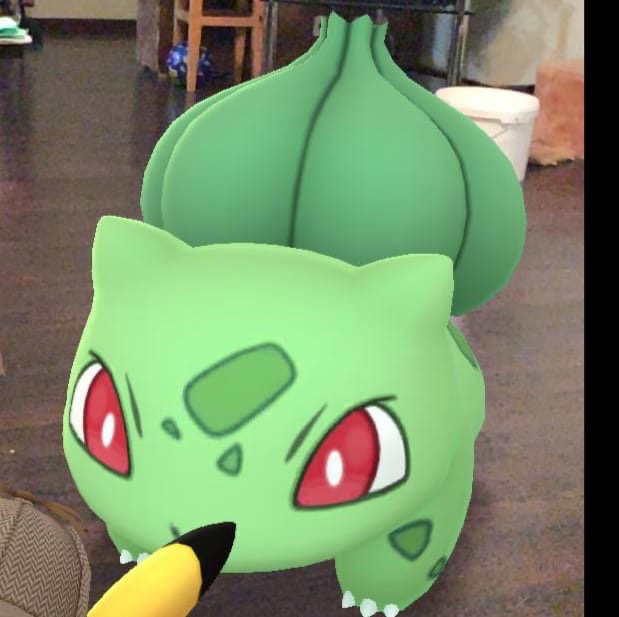

In [ ]:
image=Image.open('/content/drive/MyDrive/pokemon/test/0oXO8CegjZU.jpg')
image

In [ ]:

image = np.array(image).astype('float32')/255
image = transform.resize(image, (224, 224, 3))
image = np.expand_dims(image, axis=0)
model.predict(image).argmax(axis=-1)

1/1 [==============================] - 0s 24ms/step


array([122])

не повезло((